# チャレンジ: データサイエンスに関するテキストの分析

> *このノートブックでは、異なるURLを使用して実験を行います - 機械学習に関するWikipediaの記事です。データサイエンスとは異なり、この記事には多くの専門用語が含まれており、そのため分析がより困難になります。キーワード抽出を行った後に、頻出だが意味のない単語の組み合わせを取り除くための別の方法を考え出す必要があります。*

この例では、伝統的なデータサイエンスプロセスのすべてのステップをカバーする簡単な演習を行います。コードを書く必要はありません。以下のセルをクリックして実行し、結果を観察するだけで構いません。チャレンジとして、異なるデータでこのコードを試してみることをお勧めします。

## 目標

このレッスンでは、データサイエンスに関連するさまざまな概念について議論してきました。**テキストマイニング**を行うことで、さらに関連する概念を発見してみましょう。データサイエンスに関するテキストを使用し、そこからキーワードを抽出し、結果を視覚化してみます。

テキストとして、Wikipediaのデータサイエンスに関するページを使用します:


In [2]:
url = 'https://en.wikipedia.org/wiki/Data_science'
url = 'https://en.wikipedia.org/wiki/Machine_learning'

## ステップ1: データの取得

データサイエンスプロセスの最初のステップは、データを取得することです。これには `requests` ライブラリを使用します:


In [3]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Machine learning - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"77162785-16e9-4d7f-a175-7f3fcf502a66","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Machine_learning","wgTitle":"Machine learning","wgCurRevisionId":1041247229,"wgRevisionId":1041247229,"wgArticleId":233488,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: missing periodical","Harv and Sfn no-target errors","CS1 maint: uses authors parameter","Articles with short description","Short description is dif

## ステップ2: データの変換

次のステップは、データを処理に適した形式に変換することです。今回の場合、ページからHTMLソースコードをダウンロードしており、それをプレーンテキストに変換する必要があります。

これを行う方法は多数あります。ここでは、Pythonの組み込みの最も簡単な[HTMLParser](https://docs.python.org/3/library/html.parser.html)オブジェクトを使用します。`HTMLParser`クラスをサブクラス化し、HTMLタグ内のすべてのテキストを収集するコードを定義します。ただし、`<script>`タグと`<style>`タグ内のテキストは除外します。


In [4]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Machine learning - Wikipedia Machine learning From Wikipedia, the free encyclopedia Jump to navigation Jump to search Study of algorithms that improve automatically through experience For the journal, see  Machine Learning (journal) . "Statistical learning" redirects here. For statistical learning in linguistics, see  statistical learning in language acquisition . Part of a series on Artificial intelligence Major goals Artificial general intelligence Planning Computer vision General game playing Knowledge reasoning Machine learning Natural language processing Robotics Approaches Symbolic Deep learning Bayesian networks Evolutionary algorithms Philosophy Ethics Existential risk Turing test Chinese room Control problem Friendly AI History Timeline Progress AI winter Technology Applications Projects Programming languages Glossary Glossary v t e Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection Data Cleaning AutoML Associ

## ステップ3: 洞察を得る

最も重要なステップは、データを洞察を引き出せる形に変えることです。今回の場合、テキストからキーワードを抽出し、どのキーワードがより意味のあるものかを確認したいと考えています。

キーワード抽出には、[RAKE](https://github.com/aneesha/RAKE)というPythonライブラリを使用します。まず、このライブラリがインストールされていない場合に備えて、インストールを行いましょう:


In [5]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


主な機能は `Rake` オブジェクトから利用可能であり、いくつかのパラメーターを使用してカスタマイズできます。私たちの場合、キーワードの最小長を5文字、ドキュメント内でのキーワードの最小頻度を3、キーワード内の最大単語数を2に設定します。他の値を試して結果を観察してみてください。


In [6]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('data mining', 4.0),
 ('polynomial time', 4.0),
 ('dimensionality reduction', 4.0),
 ('anomaly detection', 4.0),
 ('data set', 4.0),
 ('bayesian networks', 4.0),
 ('language corpora', 4.0),
 ('mcgraw hill', 4.0),
 ('mit press', 4.0),
 ('retrieved 2018-08-20', 4.0),
 ('artificial neuron', 3.9642857142857144),
 ('statistical learning', 3.9470198675496686),
 ('feature learning', 3.9470198675496686),
 ('reinforcement learning', 3.9470198675496686),
 ('deep learning', 3.9470198675496686),
 ('main article', 3.9411764705882355),
 ('machine learning', 3.9144111718974948),
 ('pattern recognition', 3.9),
 ('neural networks', 3.875),
 ('artificial intelligence', 3.864285714285714),
 ('supervised learning', 3.835908756438558),
 ('speech recognition', 3.833333333333333),
 ('bayesian network', 3.833333333333333),
 ('explicitly programmed', 3.8),
 ('biological brain', 3.8),
 ('unsupervised learning', 3.780353200883002),
 ('outlier detection', 3.75),
 ('ieee transactions', 3.75),
 ('isbn 978-0-262-0

私たちは、重要度と関連付けられた用語のリストを取得しました。ご覧の通り、機械学習やビッグデータのような最も関連性の高い分野が、リストの上位に位置しています。

## ステップ4: 結果の可視化

データは視覚的な形で表現することで最も理解しやすくなります。そのため、洞察を得るためにデータを可視化することはよくあることです。Pythonの`matplotlib`ライブラリを使用して、キーワードとその関連性の簡単な分布をプロットすることができます。


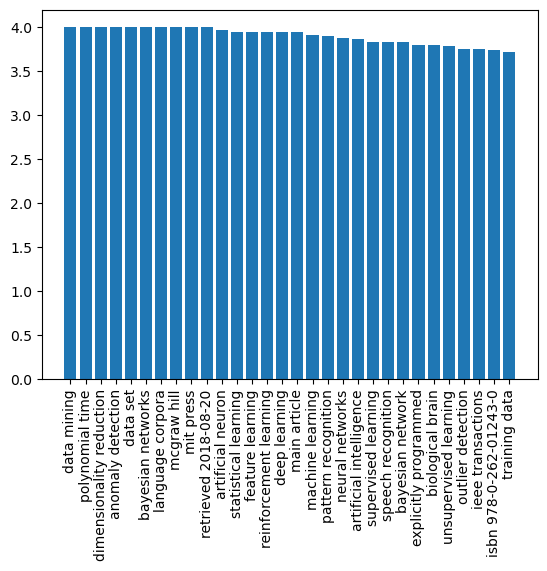

In [9]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res[:30])

しかし、単語の頻度を視覚化するさらに良い方法があります。それは、**ワードクラウド**を使用することです。キーワードリストからワードクラウドをプロットするために、別のライブラリをインストールする必要があります。


In [71]:
!{sys.executable} -m pip install wordcloud

`WordCloud`オブジェクトは、元のテキストまたは事前に計算された単語とその頻度のリストを受け取り、画像を返します。その画像は`matplotlib`を使用して表示することができます。


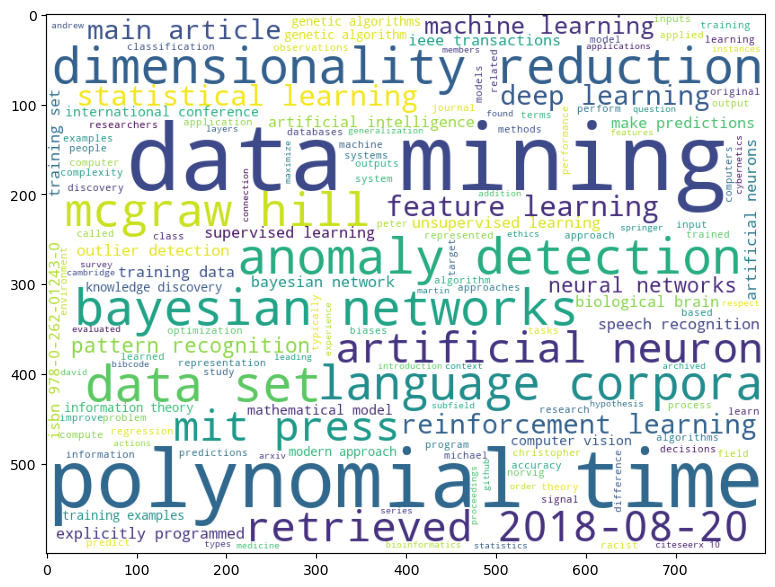

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))
plt.show()

元のテキストを `WordCloud` に渡すこともできます - 同様の結果が得られるか見てみましょう:


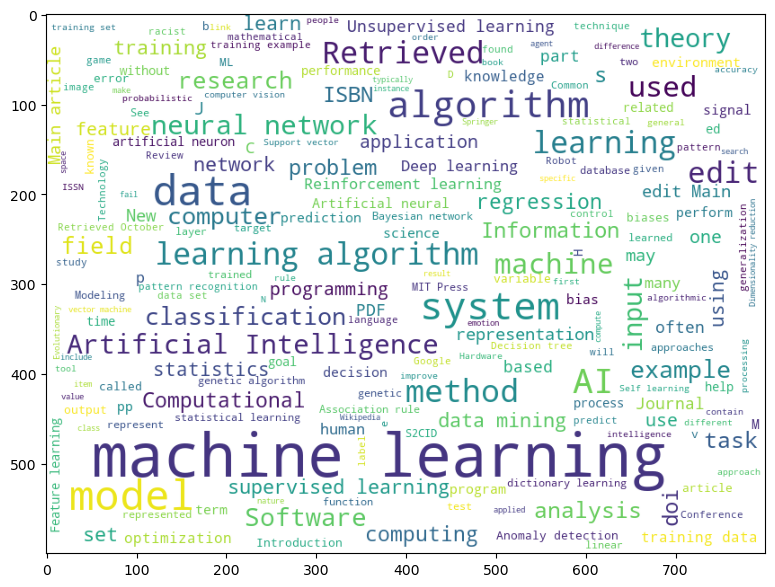

In [13]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))
plt.show()

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

ワードクラウドが以前よりも印象的に見えるようになりましたが、同時に多くのノイズ（例えば、`Retrieved on`のような無関係な単語）も含まれています。また、*data scientist* や *computer science* のような2語からなるキーワードが少なくなっています。これは、RAKEアルゴリズムがテキストから適切なキーワードを選び出すのに優れているためです。この例は、データの前処理とクリーニングの重要性を示しています。最終的に明確な結果を得ることで、より良い意思決定が可能になります。

この演習では、Wikipediaのテキストからキーワードやワードクラウドの形で意味を抽出する簡単なプロセスを体験しました。この例は非常にシンプルですが、データサイエンティストがデータを扱う際に取る典型的なステップ、データ取得から可視化までをよく示しています。

このコースでは、これらすべてのステップについて詳しく説明していきます。



---

**免責事項**:  
この文書は、AI翻訳サービス [Co-op Translator](https://github.com/Azure/co-op-translator) を使用して翻訳されています。正確性を期すよう努めておりますが、自動翻訳には誤りや不正確な表現が含まれる可能性があります。元の言語で記載された原文が公式な情報源と見なされるべきです。重要な情報については、専門の人間による翻訳を推奨します。この翻訳の使用に起因する誤解や誤解釈について、当方は一切の責任を負いません。
